In [2]:
import numpy as np
np.set_printoptions(threshold=50)
from datascience import *


%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Charts

In [4]:
#data = 'http://inferentialthinking.com/notebooks/actors.csv'

#ordered by the total gross of all movies that have an actor in it
#in millions
data = 'int5-survey2.csv'
s2 = Table.read_table(data)
s2

Lab,Excited,Difficulty,Challenging problems,Pace,Other courses,Confident (visualize),Confident (analyze),Confident (programming)
Section 03 (noon),Strongly agree,Slightly difficult,No,just right,Neutral,Moderately,Moderately,Very
Section 02 (11am),Strongly agree,Moderately difficult,No,just right,Agree,Moderately,Moderately,Moderately
Section 03 (noon),Agree,Slightly difficult,No,just right,Agree,Moderately,Somewhat,Somewhat
Section 01 (10am),Agree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Moderately
Section 01 (10am),Agree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Moderately
Section 01 (10am),Agree,Very difficult,No,just right,Agree,Moderately,Moderately,Somewhat
Section 02 (11am),Strongly agree,Very difficult,No,just right,Neutral,Somewhat,Somewhat,Moderately
Section 01 (10am),Disagree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Not at all
Section 02 (11am),Strongly disagree,Slightly difficult,No,just right,Strongly disagree,Moderately,Moderately,Moderately
Section 01 (10am),Agree,Moderately difficult,No,too slow,Agree,Moderately,Moderately,Not at all


In [9]:
by_section = s2.group("Lab")
by_section

Lab,count
Section 01 (10am),17
Section 02 (11am),17
Section 03 (noon),12


In [10]:
sec1 = s2.where("Lab", are.containing("01"))
sec1

Lab,Excited,Difficulty,Challenging problems,Pace,Other courses,Confident (visualize),Confident (analyze),Confident (programming)
Section 01 (10am),Agree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Moderately
Section 01 (10am),Agree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Moderately
Section 01 (10am),Agree,Very difficult,No,just right,Agree,Moderately,Moderately,Somewhat
Section 01 (10am),Disagree,Moderately difficult,Yes,just right,Agree,Moderately,Moderately,Not at all
Section 01 (10am),Agree,Moderately difficult,No,too slow,Agree,Moderately,Moderately,Not at all
Section 01 (10am),Strongly agree,Slightly difficult,Yes,just right,Strongly Agree,Not at all,Not at all,Moderately
Section 01 (10am),Agree,Moderately difficult,Yes,just right,Neutral,Moderately,Very,Somewhat
Section 01 (10am),Strongly agree,Moderately difficult,Yes,just right,Agree,Very,Very,Very
Section 01 (10am),Neutral,Slightly difficult,Yes,just right,Neutral,Very,Very,Very
Section 01 (10am),Agree,Not at all difficult,Yes,just right,Agree,Moderately,Moderately,Moderately


In [20]:
s2.group("Excited")
# sec1.group("Excited")

Excited,count
Agree,21
Disagree,1
Neutral,6
Strongly agree,16
Strongly disagree,2


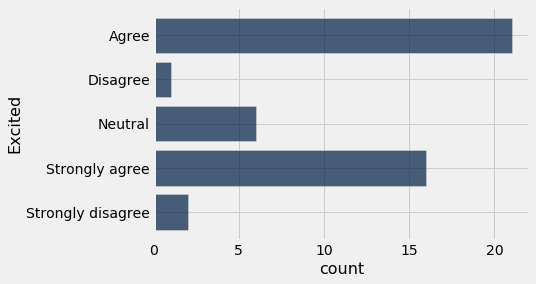

In [15]:
s2.group("Excited").barh("Excited")

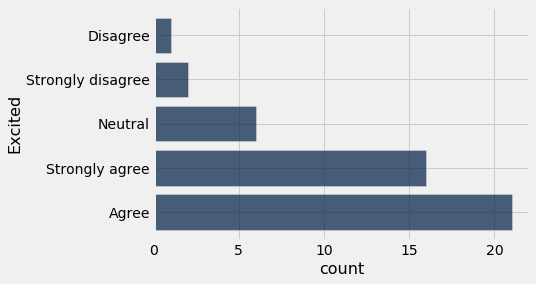

In [18]:
s2.group("Excited").sort("count").barh("Excited")

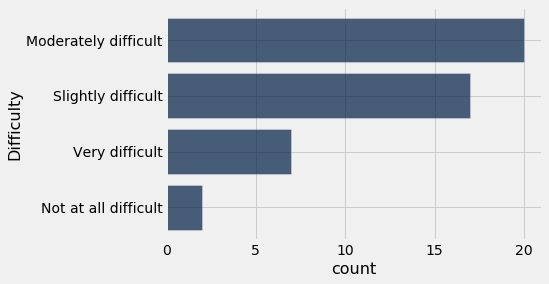

In [25]:
s2.group("Difficulty").sort("count", descending = True).barh("Difficulty")

In [43]:
difficulty = s2.group("Difficulty").sort("count", descending = True)
difficulty

Difficulty,count
Moderately difficult,20
Slightly difficult,17
Very difficult,7
Not at all difficult,2


In [30]:
total = difficulty.column("count").sum()
total

46

In [57]:
difficulty.with_column("proportion", difficulty.column("count")/total)
# difficulty.with_column("proportion", np.round(difficulty.column("count")/total, 2))

Difficulty,count,proportion
Moderately difficult,20,0.434783
Slightly difficult,17,0.369565
Very difficult,7,0.152174
Not at all difficult,2,0.0434783


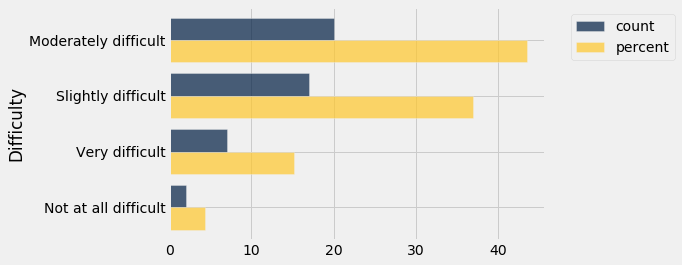

In [45]:
difficulty.with_column("percent", (difficulty.column("count")/total)*100).barh("Difficulty")

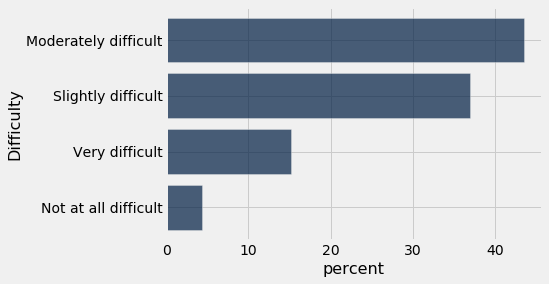

In [46]:
difficulty.with_column("percent", (difficulty.column("count")/total)*100).barh("Difficulty", "percent")

In [4]:
s2.group("Challenging problems").barh("Challenging problems")

NameError: name 's2' is not defined

# Our first function definition

def double(x):
    """ Double x """
    return 2*x

## Bar Charts

In [3]:
#data = 'http://inferentialthinking.com/notebooks/top_movies.csv'

data = 'top_movies.csv'
top = Table.read_table(data)
top

FileNotFoundError: File b'top_movies.csv' does not exist

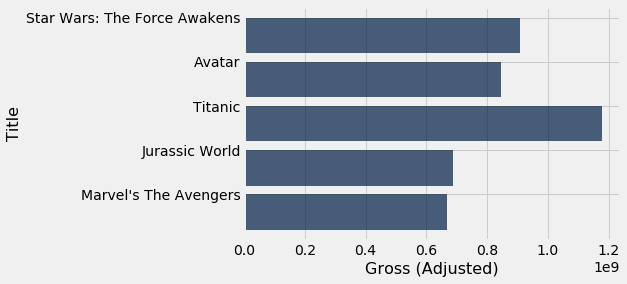

In [15]:
top5 = top.take(np.arange(5))
top5.barh('Title', 'Gross (Adjusted)')

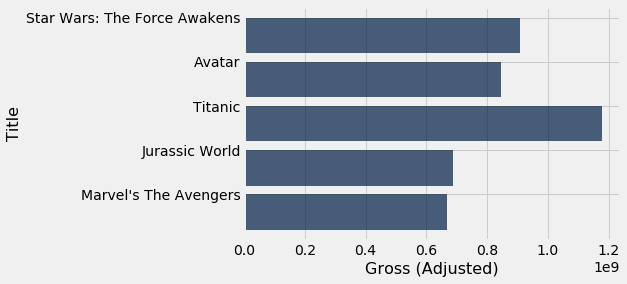

In [16]:
top5.barh(0, 3)

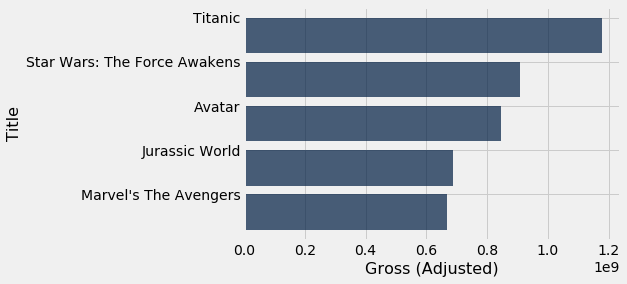

In [17]:
top5.sort(3, descending=True).barh(0, 3)

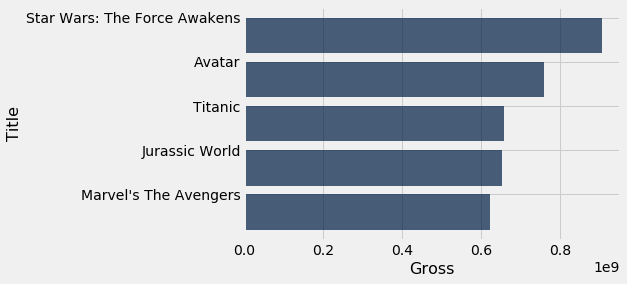

In [18]:
top5.select(0, 2).barh('Title')

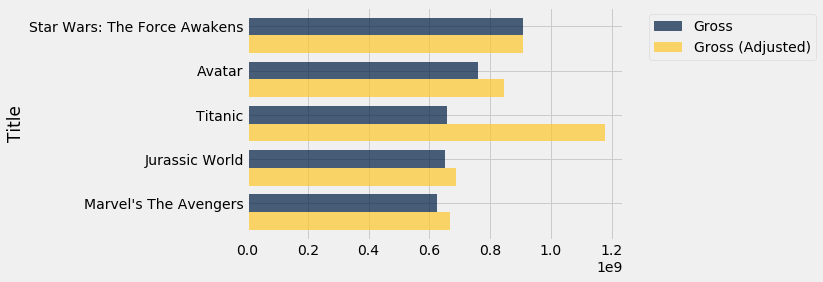

In [19]:
top5.select(0, 2, 3).barh('Title')

In [20]:
top5.barh('Title')

ValueError: The column 'Studio' contains non-numerical values. A plot cannot be drawn for this column.

## Bar Charts of Counts

In [21]:
#What if I want to count how many movies belong to Disney. How? 












#compute a distibution of categories
studios = top.group('Studio')
studios

Studio,count
AVCO,1
Buena Vista (Disney),29
Columbia,10
Disney,11
Dreamworks,3
Fox,26
IFC,1
Lionsgate,3
MGM,7
MPC,1


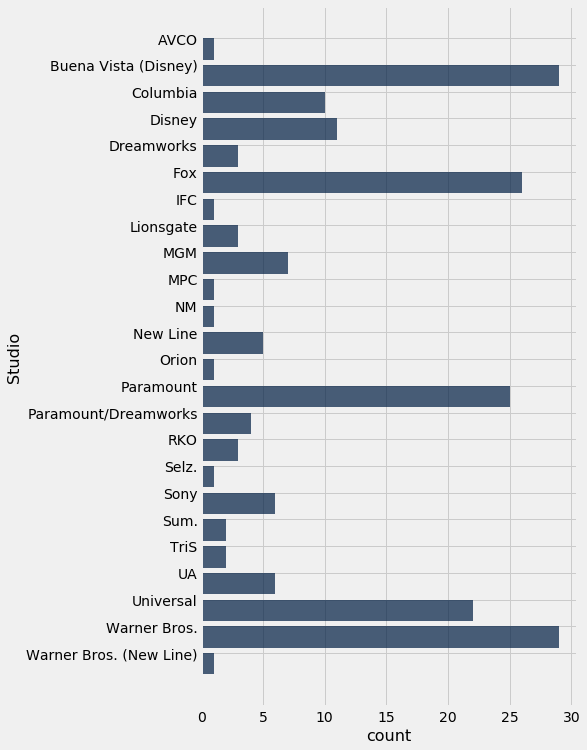

In [68]:
studios.barh('Studio')

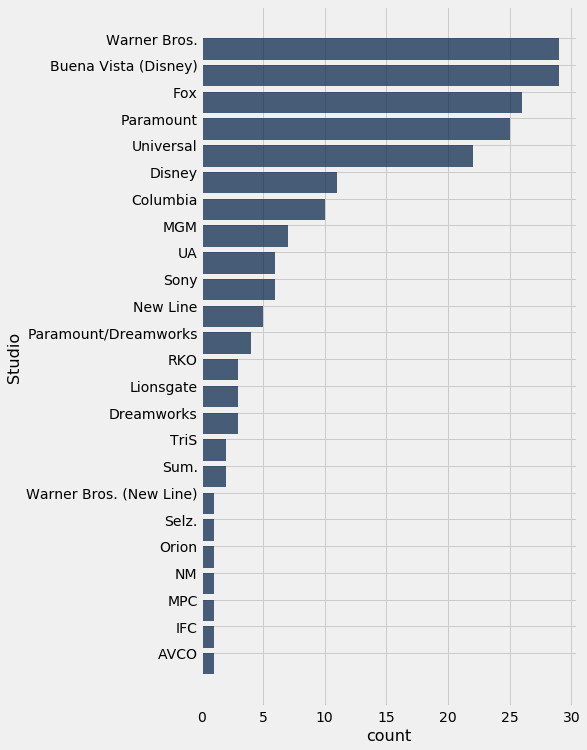

In [22]:
#sorting for easier comparison
studios.sort('count', descending=True).barh('Studio')

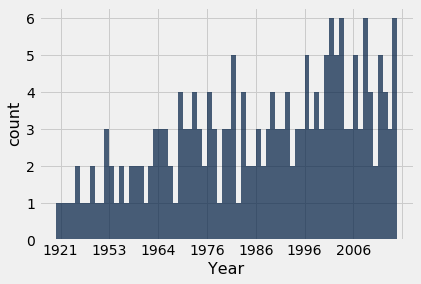

In [24]:
top.group('Year').barh('Year') #change barh to bar

## Discussion Question

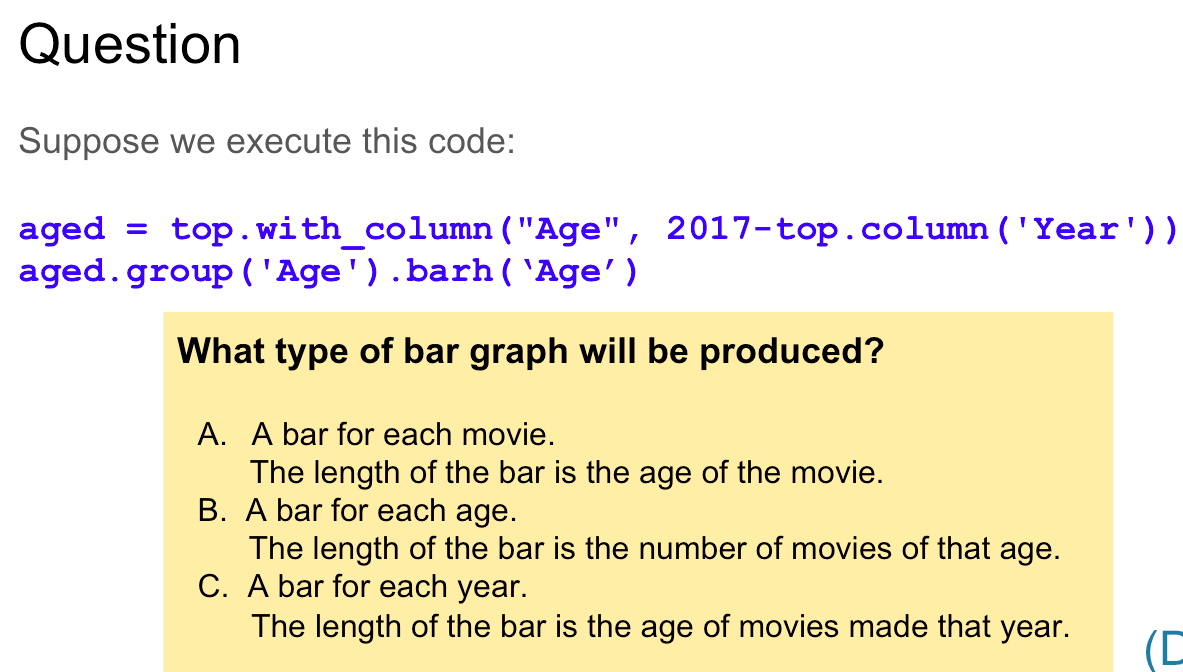

In [25]:
from IPython.display import Image
Image("q9.png", width=600)

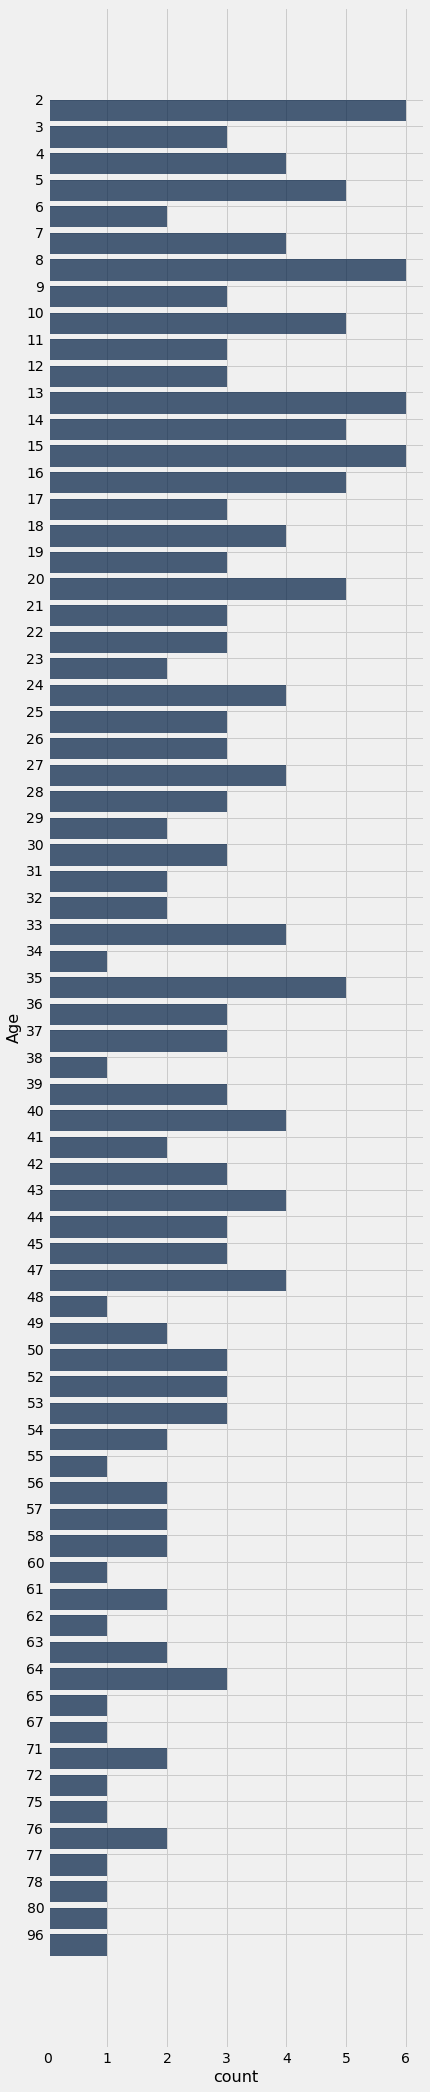

In [26]:
#Distribution of the ages.

aged = top.with_column("Age", 2017-top.column('Year'))
aged.group('Age').barh('Age')


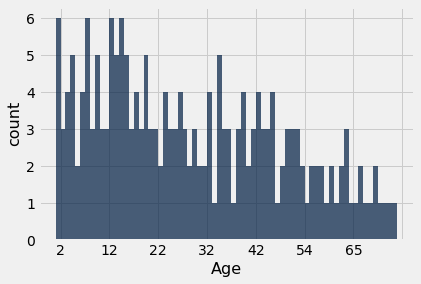

In [34]:
#might be easier to use vertical bars here
aged.group('Age').bar('Age')

##  Histograms


In [31]:
aged.group("Age")

Age,count
96,1
80,1
78,1
77,1
76,2
75,1
72,1
71,2
67,1
65,1


In [29]:
#bin them using column "Age"
aged.bin('Age').show()

#first row: bin contains all ages with 2 <= age < 11.4
#there are 41 values in this bin 
#default bins are ten evenly spaced bins: (96-2)/10 = 94/10 = 9.4 width
#the last row is not really a bin (always empty) - just shows you where the previous bin ends

bin,Age count
2,41
11.4,40
20.8,30
30.2,24
39.6,24
49,20
58.4,11
67.8,7
77.2,2
86.6,1


In [35]:
#let's define our own bins
#inputs: (name of your bins, values for bounds)

aged.bin('Age', bins = make_array(0, 20, 40, 60, 80, 100))

bin,Age count
0,76
20,59
40,44
60,19
80,2
100,0


In [37]:
#how can I use np.arange here to create the same table? 


























bounds = np.arange(0, 101, 20)
bounds

array([  0,  20,  40,  60,  80, 100])

In [38]:
aged.bin('Age', bins=bounds)

bin,Age count
0,76
20,59
40,44
60,19
80,2
100,0


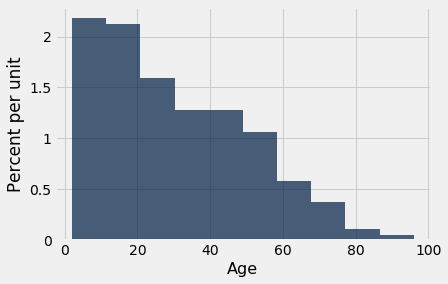

In [39]:
#ready for a histogram with the ten default bins
aged.hist('Age')

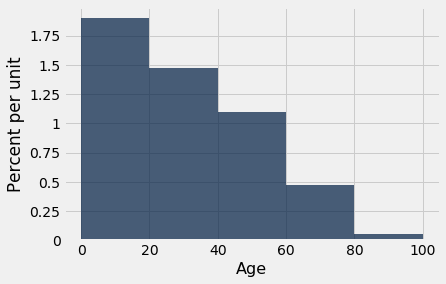

In [41]:
#arrange better, with our five custom bins
aged.hist('Age', bins=bounds) #bounds = np.arange(0, 101 , 20)

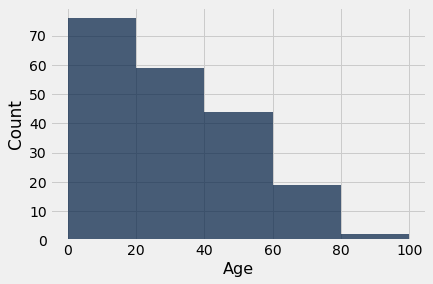

In [42]:
#change the vertical axis to make more sense
#why such a strange vertical axis by default?

aged.hist('Age', bins=bounds, normed=False)

## Combining Bins

### Question

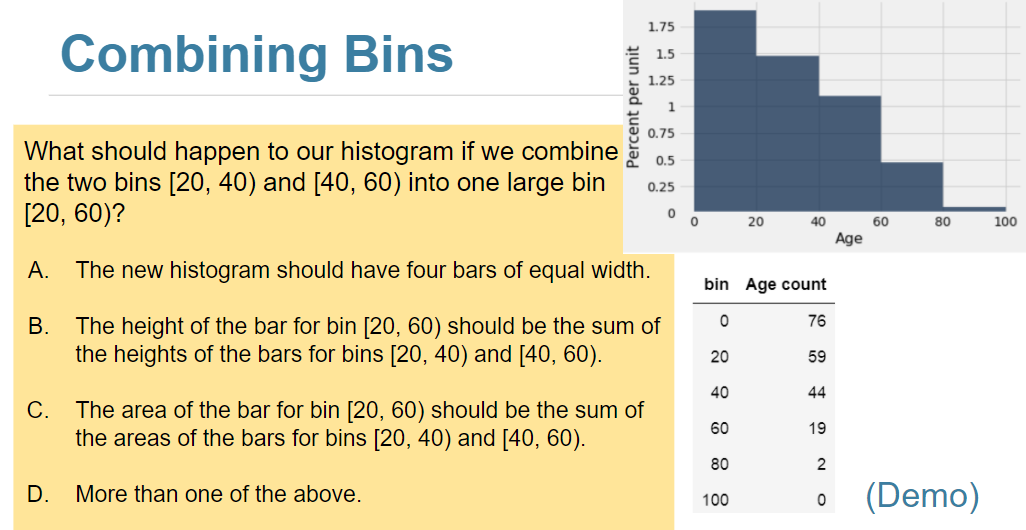

In [46]:
from IPython.display import Image
Image("q10.png", width=600)

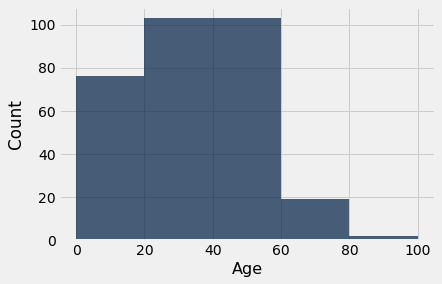

In [47]:
aged.hist('Age', bins=make_array(0, 20, 60, 80, 100), normed=False) #new bin has sum of heights of previous bins

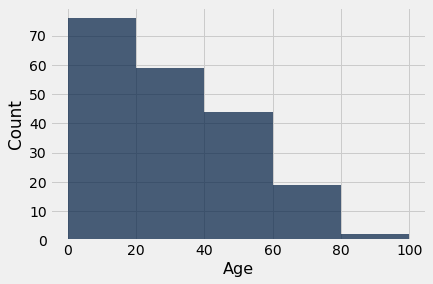

In [48]:
#compare with original distribution

aged.hist('Age', bins=np.arange(0, 101, 20), normed=False)

In [6]:
aged.hist('Age', bins=make_array(0, 20, 60, 80, 100), normed=True) #new bin has sum of areas of previous bins

NameError: name 'aged' is not defined

## Density


In [ ]:
# I want smaller bins
aged.hist('Age', bins=np.arange(0, 101, 5), unit='year',  normed = False)

In [ ]:
#too much detail at the end
#can combine bins into bigger bins:

np.arange(0, 101, 5)

In [ ]:
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80,  85,  90,  95, 100], unit='year',  normed = False)

In [ ]:
#smooth out the last cell:

aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,
        65,  70,  75,  80, 100], unit='year',  normed = False)

In [ ]:
#60 - 80
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  45,  50,  55, 
                       60, 80, 100], unit='year',  normed = False)


In [ ]:
#40 - 60
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  60, 80, 100], unit='year',  normed = False)


# Why these bars look so much bigger now? I lost the shape of my distribution :(

In [ ]:
#why is this bar looks so much bigger now? Why did I loose the shape of my distribution? 
aged.bin("Age", bins = [0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  60, 80, 100])




















#area principle is violated! 

In [ ]:
aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40, 100], unit='year',  normed = False)

In [ ]:
#what we will do instead: each bar area corresponds to an actual proportion  of % of the movies that
#fall into this bin.

aged.hist('Age', bins=[ 0,   5,  10,  15,  20,  25,  30,  
                       35,  40,  100], unit='year')

#the original shape of my distribution is back!

In [ ]:
#back to the slides


In [ ]:
aged.bin("Age", bins = [0,   5,  10,  15,  20,  25,  30,  
                       35,  40, 100]).show()

## Question

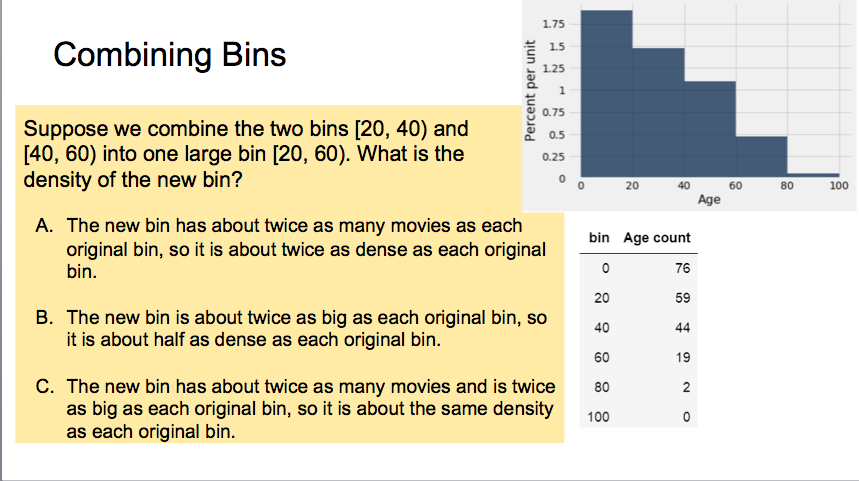

In [3]:
from IPython.display import Image
Image("q11.png", width=600)

In [ ]:
#d. question
aged.hist('Age', bins=make_array(0, 20, 40, 60, 80, 100), normed=True) #compare

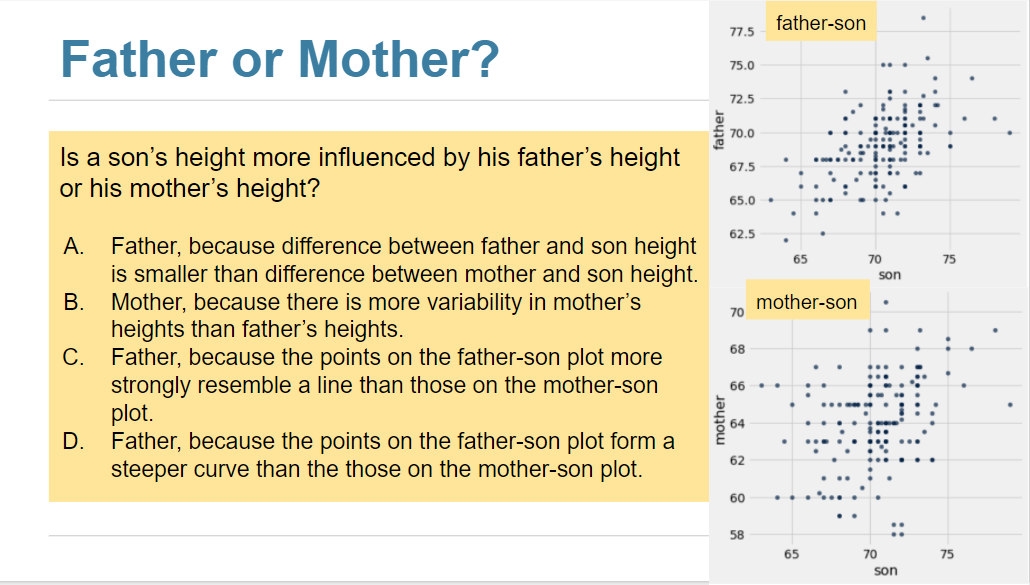

In [4]:
from IPython.display import Image
Image("q12.png", width=600)

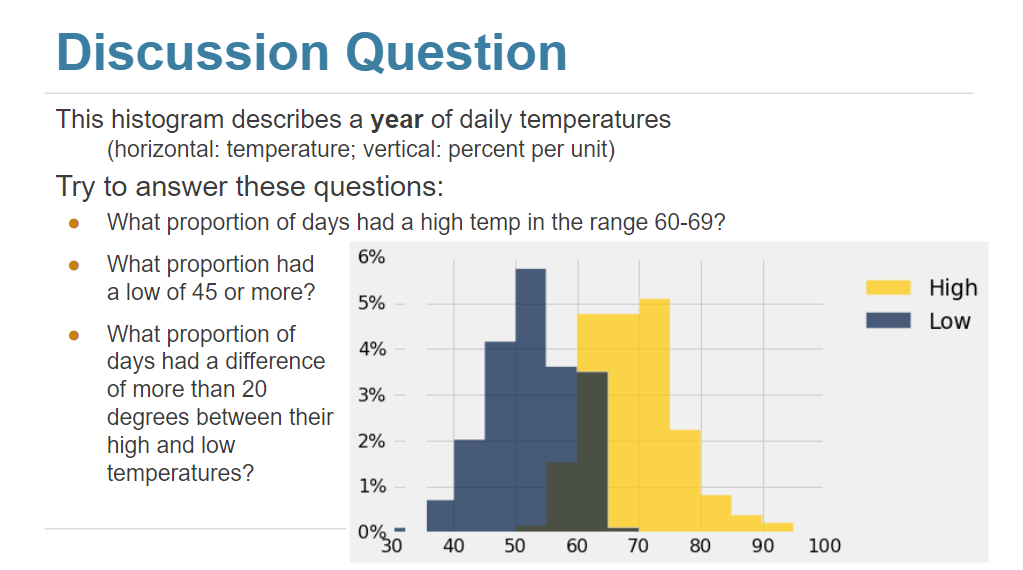

In [5]:
from IPython.display import Image
Image("q13.png", width=600)